___

<p style = "font-family:courier;font-size:25px;">
BR35H-MASK-RCNN      
</p>

<p style = "font-family:courier;font-size:15px;">
Capstone Phase 5 Project     
</p>

<b>Name:</b> Ansel Vallejo

<i><font color = 'gray'>Source: </font></i>
https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

___

#### <b> Overview </b>

<div style="text-align: justify">
In the medical field, Brain tumor is seen as a serious, abnormal growth of cells in or near the brain that can be either benign, which is non-cancerous or malignant, which is cancerous. There are many treatments an individual with such tumor can receive, such as radiation therapy, chemotherapy, therapeutic drug, etc. Brain tumor can be seen via Magnetic Resonance Imaging (MRI) scanned images. Human error is prone to occur in any industry, and because of such error in the medical field can cost a life. To detect and identify what constitutes a benign or malignant tumor without human intervention would be to build a robust deep learning model to help the medical practitioner properly classify a cancerous from noncancerous tumors using over 3000 MRI scan trained images and testing images to help better serve the model.
</div>

<b>Algorithm Implemented: </b> <i>Convolutional Neural Network</i> (Deep Learning) <br>
<b>Data type: </b> Unstructured <br>
<br>
<br>
<b>Data Classification: </b>
    <ul>
        <li><b>NO</b> (no tumor) - classified as 0</li>
        <li><b>YES</b> (yes tumor) - classified as 1</li>
    </ul>


___

### Import Libraries

In [2]:
import pandas as pd                       #Data Analysis and manipulation tool
import numpy as np                        #Scientific computing
import matplotlib.pyplot as plt           #Visualization
from matplotlib.colors import Normalize
import tensorflow as tf
import seaborn as sns
%matplotlib inline

#Import image data
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from PIL import Image
import random
import pickle
import cv2
import os

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#KERAS
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

                                                Number of GPUs Available

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" 

___

### Import Data

<b> load_data </b> <i>(Function)</i>


<div style="text-align: justify">
The function is iterating through the <i>directory</i>, and <i>categories</i> defined, then classifying the data by 'yes' <b>{1}</b> or 'no' <b>{0}</b>, depending on the data folder the images are extracted from. After categorizing the data, we proceed in converting the images into grayscale, and resizing according to spec. we then append the <i>data</i> list to combine both the resized array with its respective categorical number. After the data is prepared, the data is shuffled then separated into the <i> image</i> and <i>label</i> list, followed up by reshaping the <i>image</i> variable list. Then, the data is returned and included into the <i> image </i> and <i>label</i> variables outside of the function to then be referenced and follow up with saving into a pickle file format to then be referenced when needed.
    </div>

In [4]:
#import cv2

#Empty list to store images and labels
data = []

#Folder category found in data folder
directory = "data/"
categories = ["no", "yes"]
IMG_SIZE = 64

#Function that loads the image data, categorizes images, resize, shuffles, and creates image and label lists
def load_data():
    
    for classification in categories:
        path = os.path.join(directory, classification)
        cat_num = categories.index(classification)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, cat_num])
            except Exception as e:
                pass
       
    random.shuffle(data)


    image = []
    label = []   
    for images, labels in data:
        image.append(images)
        label.append(labels)
        
    image = np.array(image)#.reshape(IMG_SIZE, IMG_SIZE)
    label = np.array(label)
    
    
    return image, label, img_array


image, label, img_array= load_data()


___

<b> plot_images_5_5</b> <i>(Function)</i><br>

<div style="text-align: justify">
The function creates a 5x5 grid of subplots using the subplots() function. It then loops through each subplot and resizes the corresponding image using the resize() function from OpenCV. It then displays the image in the subplot using the imshow() function from matplotlib. The title of each subplot is set to the corresponding category label using the set_title() function from matplotlib. The x and y ticks are removed from each subplot using the set_xticks() and set_yticks() functions from matplotlib.
    </div>

In [65]:
def plot_images_5_5():
    
    
    fig, axs = plt.subplots(5, 5)

    for i in range(len(axs)):
        for j in range(len(axs[i])):
            new_array = cv2.resize(image[i*len(axs[i])+j], (IMG_SIZE, IMG_SIZE))
            axs[i][j].imshow(new_array, cmap='gray')
            axs[i][j].set_title(categories[label[i*len(axs[i])+j]])
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            
            
    plt.tight_layout()
    plt.show()

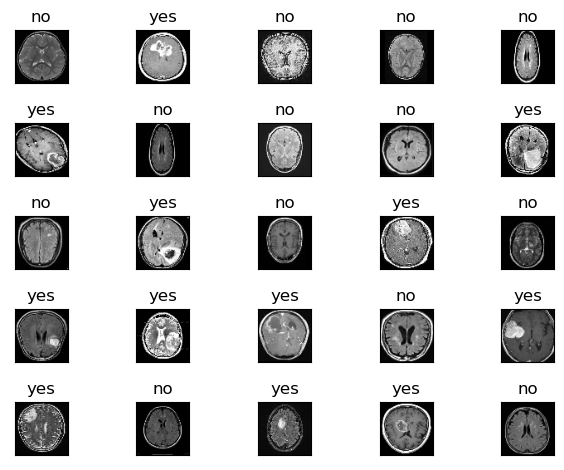

In [66]:
plot_images()

___

<b>plot_images_2_3</b> <i>(Function)</i>

<div style="text-align: justify">
The function loops through the first 6 images in the image list and creates a 2x3 grid of subplots using the subplot() function. It then displays the corresponding image in each subplot using the imshow() function from matplotlib. The title of each subplot is set to the corresponding category label using the title() function from matplotlib. The x and y ticks are removed from each subplot using the xticks() and yticks() functions from matplotlib.
    </div>

In [67]:
def plot_images_2_3():
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(image[i])
        plt.title(categories[label[i]])
        plt.xticks([])
        plt.yticks([])

    plt.show()

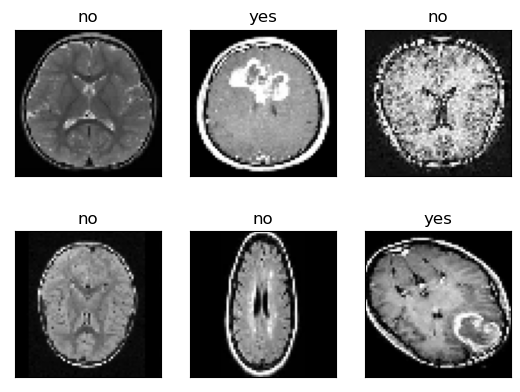

In [68]:
plot_images_2_3()

___

In [169]:
load_data()

(array([[[[ 6,  6,  6],
          [ 5,  5,  5],
          [ 6,  6,  6],
          ...,
          [ 5,  5,  5],
          [ 4,  4,  4],
          [ 4,  4,  4]],
 
         [[ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0],
          ...,
          [ 2,  2,  2],
          [ 1,  1,  1],
          [ 1,  1,  1]],
 
         [[ 0,  0,  0],
          [ 1,  1,  1],
          [ 0,  0,  0],
          ...,
          [ 1,  1,  1],
          [ 1,  1,  1],
          [ 2,  2,  2]],
 
         ...,
 
         [[ 1,  1,  1],
          [ 0,  0,  0],
          [ 0,  0,  0],
          ...,
          [ 0,  0,  0],
          [ 0,  0,  0],
          [ 1,  1,  1]],
 
         [[ 2,  2,  2],
          [ 0,  0,  0],
          [ 1,  1,  1],
          ...,
          [ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0]],
 
         [[ 3,  3,  3],
          [ 1,  1,  1],
          [ 3,  3,  3],
          ...,
          [ 2,  2,  2],
          [ 1,  1,  1],
          [ 2,  2,  2]]],
 
 
        [

In [137]:
image.shape

(3000, 64, 64, 3)

___

### Saving Data

 <b> Save Data</b> <i>(.pkl file extension)</i><br>


[[DESCRIPTION]]

In [5]:
pickle_out = open('image.pickle', 'wb')
pickle.dump(image, pickle_out)
pickle_out.close()
    
pickle_out = open('label.pickle', 'wb')
pickle.dump(label, pickle_out)
pickle_out.close()

In [6]:
pickle_in = open('image.pickle', 'rb')
image = pickle.load(pickle_in)

pickle_in = open('label.pickle', 'rb')
label = pickle.load(pickle_in)

___

###### <i> <font color = 'blue'> TESTING pickle_in </font> </i>

In [45]:
image[1]

array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)

___

### <font size = '4'> <b> DISPLAY IMAGE BY IMAGE SIZE </b></font>

<b><i> <font color = 'purple'> (1 x 3) </font> </i></b>

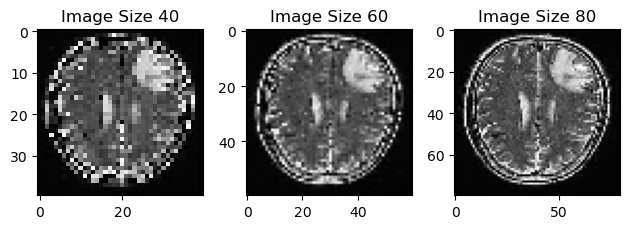

In [37]:
fig, axs = plt.subplots(1, 3)

directory = "data/"
categories = ["no", "yes"]
IMG_SIZE = 40

for i in range(len(axs)):
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    axs[i].imshow(new_array, cmap='gray')
    axs[i].set_title(f'Image Size {IMG_SIZE}')
    IMG_SIZE += 20

plt.tight_layout()
plt.show()

<b><i> <font color = 'purple'> (3 x 3) </font> </i></b>

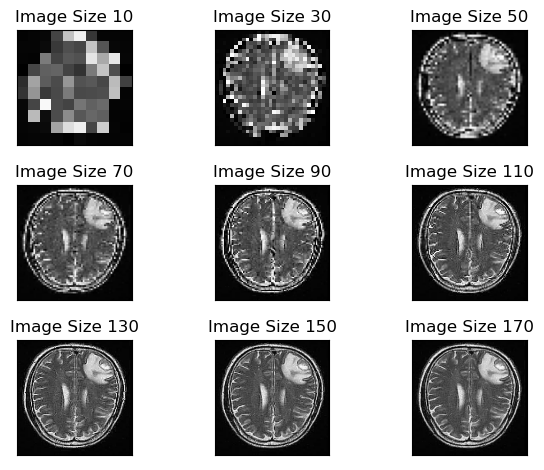

In [115]:
fig, axs = plt.subplots(3, 3)

IMG_SIZE = 10

for i in range(len(axs)):
    for j in range(len(axs)):
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        axs[i, j].imshow(new_array, cmap='gray')
        axs[i, j].set_title(f'Image Size {IMG_SIZE}')
        IMG_SIZE += 20

for ax in axs.flat:
    ax.set(xticks=[], yticks=[])
        
plt.tight_layout()
plt.show()

___

___

#### Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(image, 
                                                    label, 
                                                    test_size=0.20, 
                                                    random_state = 42)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2400, 64, 64, 3)
(2400,)
(600, 64, 64, 3)
(600,)


In [9]:
X_train = normalize(X_train, axis =1)
X_test = normalize(X_test, axis =1)

___

<b> Sequential Model </b>

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32, (3,3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


#Compile
#model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

################################################################################
################################################################################

<b><font color='red'> EXECUTE </font></b>

In [ ]:
results = model.fit(X_train, y_train, batch_size = 16, 
          verbose=1, 
          epochs=10, 
          validation_data= (X_train, y_train),
          shuffle = False)

model.save('brain_tumor_10_epochs_v3.h5')

___

<b>Data Augmentation</b> <i>(Using ImageDataGenerator)</i>

In [12]:
#Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#Compile
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

<b><font color='red'> EXECUTE </font></b> <i>(with Augmentation)</i>

In [13]:
#Run model (Augmented version)
results_augmented = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=500)

#Save model (Augmented version)
model.save('brain_tumor_500_epochs_augmented_v2.h5')

Epoch 1/500
75/75 [==============================] - 6s 77ms/step - loss: 0.6854 - accuracy: 0.5533
Epoch 2/500
75/75 [==============================] - 6s 78ms/step - loss: 0.6646 - accuracy: 0.6071
Epoch 3/500
75/75 [==============================] - 6s 79ms/step - loss: 0.6454 - accuracy: 0.6246
Epoch 4/500
75/75 [==============================] - 6s 81ms/step - loss: 0.6197 - accuracy: 0.6587
Epoch 5/500
75/75 [==============================] - 6s 81ms/step - loss: 0.6040 - accuracy: 0.6904
Epoch 6/500
75/75 [==============================] - 6s 81ms/step - loss: 0.6100 - accuracy: 0.6846
Epoch 7/500
75/75 [==============================] - 6s 82ms/step - loss: 0.5828 - accuracy: 0.6908
Epoch 8/500
75/75 [==============================] - 6s 82ms/step - loss: 0.5819 - accuracy: 0.6983
Epoch 9/500
75/75 [==============================] - 6s 83ms/step - loss: 0.5569 - accuracy: 0.7300
Epoch 10/500
75/75 [==============================] - 6s 83ms/step - loss: 0.5625 - accuracy: 0.7183

75/75 [==============================] - 7s 89ms/step - loss: 0.1293 - accuracy: 0.9533
Epoch 83/500
75/75 [==============================] - 7s 91ms/step - loss: 0.1196 - accuracy: 0.9629
Epoch 84/500
75/75 [==============================] - 7s 90ms/step - loss: 0.1218 - accuracy: 0.9563
Epoch 85/500
75/75 [==============================] - 7s 90ms/step - loss: 0.1014 - accuracy: 0.9658
Epoch 86/500
75/75 [==============================] - 7s 89ms/step - loss: 0.1093 - accuracy: 0.9592
Epoch 87/500
75/75 [==============================] - 7s 93ms/step - loss: 0.1188 - accuracy: 0.9592
Epoch 88/500
75/75 [==============================] - 8s 104ms/step - loss: 0.1242 - accuracy: 0.9550
Epoch 89/500
75/75 [==============================] - 7s 91ms/step - loss: 0.1275 - accuracy: 0.9529
Epoch 90/500
75/75 [==============================] - 8s 105ms/step - loss: 0.1209 - accuracy: 0.9521
Epoch 91/500
75/75 [==============================] - 7s 88ms/step - loss: 0.1065 - accuracy: 0.9625
E

75/75 [==============================] - 7s 97ms/step - loss: 0.0680 - accuracy: 0.9762
Epoch 163/500
75/75 [==============================] - 7s 95ms/step - loss: 0.0682 - accuracy: 0.9783
Epoch 164/500
75/75 [==============================] - 7s 99ms/step - loss: 0.1000 - accuracy: 0.9675
Epoch 165/500
75/75 [==============================] - 8s 100ms/step - loss: 0.0581 - accuracy: 0.9817
Epoch 166/500
75/75 [==============================] - 9s 125ms/step - loss: 0.0482 - accuracy: 0.9846
Epoch 167/500
75/75 [==============================] - 8s 102ms/step - loss: 0.0664 - accuracy: 0.9767
Epoch 168/500
75/75 [==============================] - 8s 107ms/step - loss: 0.0764 - accuracy: 0.9737
Epoch 169/500
75/75 [==============================] - 7s 98ms/step - loss: 0.0806 - accuracy: 0.9729
Epoch 170/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0623 - accuracy: 0.9742
Epoch 171/500
75/75 [==============================] - 8s 104ms/step - loss: 0.0683 - accur

75/75 [==============================] - 7s 91ms/step - loss: 0.0408 - accuracy: 0.9846
Epoch 243/500
75/75 [==============================] - 7s 93ms/step - loss: 0.0384 - accuracy: 0.9871
Epoch 244/500
75/75 [==============================] - 7s 91ms/step - loss: 0.0640 - accuracy: 0.9767
Epoch 245/500
75/75 [==============================] - 7s 90ms/step - loss: 0.0558 - accuracy: 0.9829
Epoch 246/500
75/75 [==============================] - 7s 89ms/step - loss: 0.0427 - accuracy: 0.9862
Epoch 247/500
75/75 [==============================] - 7s 96ms/step - loss: 0.0548 - accuracy: 0.9829
Epoch 248/500
75/75 [==============================] - 7s 90ms/step - loss: 0.0687 - accuracy: 0.9796
Epoch 249/500
75/75 [==============================] - 7s 91ms/step - loss: 0.0440 - accuracy: 0.9862
Epoch 250/500
75/75 [==============================] - 7s 94ms/step - loss: 0.0465 - accuracy: 0.9846
Epoch 251/500
75/75 [==============================] - 7s 94ms/step - loss: 0.0416 - accuracy: 0

75/75 [==============================] - 7s 87ms/step - loss: 0.0526 - accuracy: 0.9833
Epoch 323/500
75/75 [==============================] - 7s 88ms/step - loss: 0.0618 - accuracy: 0.9787
Epoch 324/500
75/75 [==============================] - 7s 88ms/step - loss: 0.0399 - accuracy: 0.9862
Epoch 325/500
75/75 [==============================] - 7s 88ms/step - loss: 0.0290 - accuracy: 0.9904
Epoch 326/500
75/75 [==============================] - 7s 86ms/step - loss: 0.0388 - accuracy: 0.9850
Epoch 327/500
75/75 [==============================] - 7s 87ms/step - loss: 0.0414 - accuracy: 0.9862
Epoch 328/500
75/75 [==============================] - 6s 86ms/step - loss: 0.0502 - accuracy: 0.9846
Epoch 329/500
75/75 [==============================] - 7s 86ms/step - loss: 0.0478 - accuracy: 0.9829
Epoch 330/500
75/75 [==============================] - 7s 87ms/step - loss: 0.0315 - accuracy: 0.9896
Epoch 331/500
75/75 [==============================] - 7s 89ms/step - loss: 0.0272 - accuracy: 0

75/75 [==============================] - 7s 87ms/step - loss: 0.0231 - accuracy: 0.9917
Epoch 403/500
75/75 [==============================] - 7s 87ms/step - loss: 0.0352 - accuracy: 0.9887
Epoch 404/500
75/75 [==============================] - 7s 87ms/step - loss: 0.0278 - accuracy: 0.9929
Epoch 405/500
75/75 [==============================] - 7s 95ms/step - loss: 0.0279 - accuracy: 0.9900
Epoch 406/500
75/75 [==============================] - 7s 89ms/step - loss: 0.0317 - accuracy: 0.9883
Epoch 407/500
75/75 [==============================] - 7s 88ms/step - loss: 0.0269 - accuracy: 0.9912
Epoch 408/500
75/75 [==============================] - 7s 87ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 409/500
75/75 [==============================] - 7s 88ms/step - loss: 0.0503 - accuracy: 0.9846
Epoch 410/500
75/75 [==============================] - 7s 88ms/step - loss: 0.0509 - accuracy: 0.9817
Epoch 411/500
75/75 [==============================] - 7s 87ms/step - loss: 0.0291 - accuracy: 0

75/75 [==============================] - 7s 92ms/step - loss: 0.0331 - accuracy: 0.9900
Epoch 483/500
75/75 [==============================] - 7s 89ms/step - loss: 0.0296 - accuracy: 0.9908
Epoch 484/500
75/75 [==============================] - 7s 90ms/step - loss: 0.0224 - accuracy: 0.9921
Epoch 485/500
75/75 [==============================] - 7s 91ms/step - loss: 0.0202 - accuracy: 0.9921
Epoch 486/500
75/75 [==============================] - 7s 91ms/step - loss: 0.0297 - accuracy: 0.9900
Epoch 487/500
75/75 [==============================] - 7s 92ms/step - loss: 0.0482 - accuracy: 0.9875
Epoch 488/500
75/75 [==============================] - 7s 93ms/step - loss: 0.0261 - accuracy: 0.9900
Epoch 489/500
75/75 [==============================] - 7s 91ms/step - loss: 0.0361 - accuracy: 0.9908
Epoch 490/500
75/75 [==============================] - 7s 91ms/step - loss: 0.0324 - accuracy: 0.9892
Epoch 491/500
75/75 [==============================] - 7s 93ms/step - loss: 0.0264 - accuracy: 0

___

<b> Evaluate model against the test data</b>

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 16ms/step - loss: 0.1332 - accuracy: 0.9817


In [16]:
print('Model Accuracy (Test data)')
print('________________________________________')
print('')
print('Model Accuracy:      ', test_acc)
print('Test Loss:          ', test_loss)
print('________________________________________')
print('')

Model Accuracy (Test data)
________________________________________

Model Accuracy:       0.9816666841506958
Test Loss:           0.13319553434848785
________________________________________



___

<i>Summary</i>

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

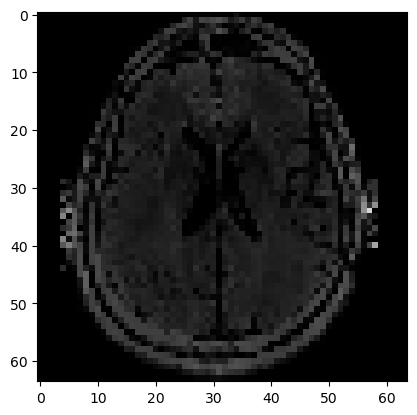

In [18]:
sample_img = X_train[222]

imgplot = plt.imshow((sample_img))


In [19]:
sample_img.shape

(64, 64, 3)

In [39]:
results = model.fit(X_train, y_train, batch_size = 16, 
                            verbose=1, 
                            epochs=10, 
                            validation_data= (X_train, y_train),
                            shuffle = False)

Epoch 1/10
129/150 [========================>.....] - ETA: 0s - loss: 0.0148 - accuracy: 0.9956

KeyboardInterrupt: 

In [42]:
results.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x1c9d8a470d0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.5490754842758179,
   0.42540547251701355,
   0.31456440687179565,
   0.22132433950901031,
   0.16236194968223572,
   0.11021943390369415,
   0.0695020854473114,
   0.05887587368488312,
   0.03215130791068077,
   0.025531752035021782],
  'accuracy': [0.7233333587646484,
   0.809166669845581,
   0.8700000047683716,
   0.909583330154419,
   0.9454166889190674,
   0.9641666412353516,
   0.9791666865348816,
   0.9829166531562805,
   0.9920833110809326,
   0.9929166436195374],
  'val_loss': [0.4515177011489868,
   0.31613463163375854,
   0.2116173654794693,
   0.15402743220329285,
   0.09838595241308212,
   0.05772896483540535,
   0.0352964885532856,
   0.025901062414050102,
   0.019818419590592384,
   0.009129732847213745],
  'val_accuracy': [0.7929166555404663,
   0.8704166412353516,
   0.9045833349227905,
   0.94125002

<b><font size = '5' color = 'green'> MODEL EVALUATION (with AUGMENTATION) </font></b>

In [95]:
test_loss, test_acc = model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 17ms/step - loss: 0.1280 - accuracy: 0.9717


In [96]:
print('Model Accuracy (Test data)')
print('________________________________________')
print('')
print('Model Accuracy:      ', test_acc)
print('Test Loss:          ', test_loss)
print('________________________________________')
print('')

Model Accuracy (Test data)
________________________________________

Model Accuracy:       0.971666693687439
Test Loss:           0.12799608707427979
________________________________________



In [97]:
results_augmented.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x2a65e41dd90>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6786282658576965,
   0.6509313583374023,
   0.6348882913589478,
   0.6277412176132202,
   0.598342776298523,
   0.5929208993911743,
   0.5819085836410522,
   0.5808476209640503,
   0.5590326189994812,
   0.5820440053939819,
   0.5585019588470459,
   0.536685049533844,
   0.5288395285606384,
   0.5017648339271545,
   0.49420812726020813,
   0.4829409718513489,
   0.4690910875797272,
   0.45321086049079895,
   0.4424959719181061,
   0.43268945813179016,
   0.42724162340164185,
   0.4017713665962219,
   0.4059348404407501,
   0.383716344833374,
   0.3826723098754883,
   0.3751889169216156,
   0.39414119720458984,
   0.37168410420417786,
   0.34364068508148193,
   0.3374626040458679,
   0.35042834281921387,
   0.32958611845970154,
   0.3053162693977356,
   0.33085259795188904,
   0.31284579634666443,
   0.27898615598678

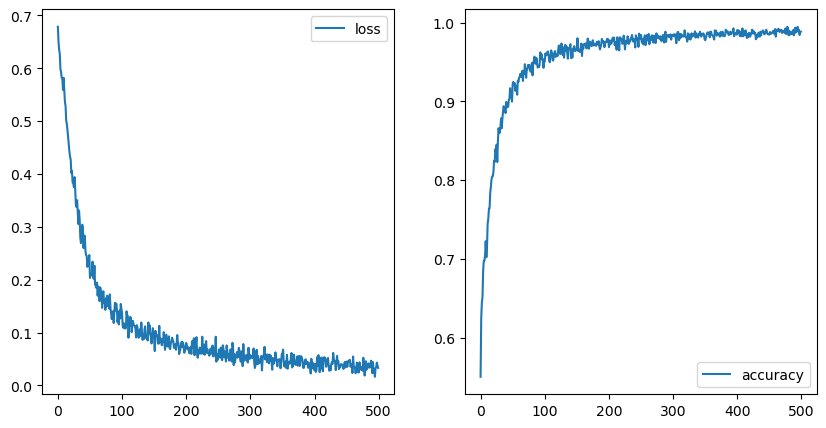

In [98]:
sigmoid_loss = results_augmented.history['loss']
sigmoid_accuracy = results_augmented.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results_augmented.epoch, y=sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(x=results_augmented.epoch, y=sigmoid_accuracy, ax=ax2, label='accuracy');

### Evaluate Model

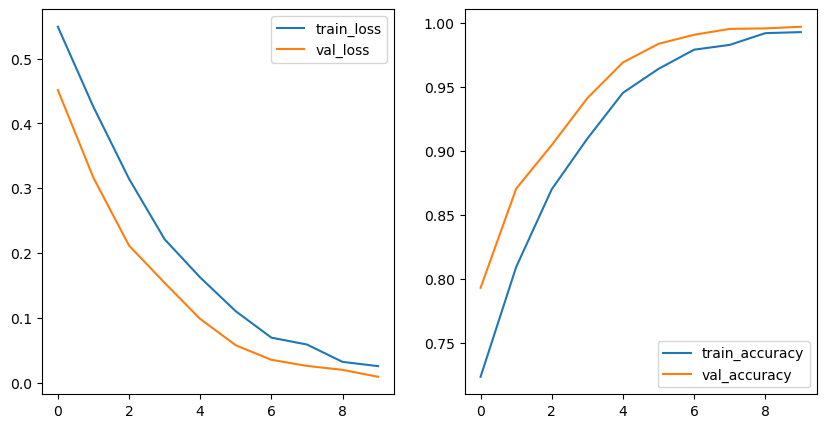

In [44]:
train_loss = results_augmented.history['loss']
train_acc = results_augmented.history['accuracy']
val_loss = results_augmented.history['val_loss']
val_acc = results_augmented.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results_augmented.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=results_augmented.epoch, y=train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=results_augmented.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=results_augmented.epoch, y=val_acc, ax=ax2, label='val_accuracy');

In [143]:
pred_tumor_list = list_dir(pred_tumor)
for i in range(len(pred_tumor_list)):
    pred_tumor_list[i] = pred_tumor + img_dir + pred_tumor_list[i]

In [21]:
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
# print(y_pred)


# Print classification report
print(classification_report(y_test, y_pred, zero_division=1))

19/19 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       292
           1       0.99      0.97      0.98       308

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



<b> Get all the data in the directory data/validation (Train: 500 images) (Test: 100 images), and reshape them </b>

#### <b><font color = 'red'>LOAD THE DATA</font> </b>

In [340]:
df_list = list(yes_no_df['path'].astype(str))

In [317]:
def load_images_from_directory(train_dir):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

#     validation_generator = test_datagen.flow_from_directory(
#         val_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')

#     predict_generator = test_datagen.flow_from_directory(
#         pred_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode=None,
#         shuffle=False)

    return train_generator #, validation_generator, predict_generator

In [348]:
load_images_from_directory('data/')

Found 0 images belonging to 0 classes.


In [ ]:


train_img_dir = 'Br35H-Mask-RCNN/VAL/'
test_img_dir = 'Br35H-Mask-RCNN/TEST/'

In [82]:
train_generator = ImageDataGenerator().flow_from_directory(
    train_img_dir,
    target_size= (256, 256),
    batch_size = 500)

Found 0 images belonging to 0 classes.


In [83]:
test_generator = ImageDataGenerator().flow_from_directory(
    test_img_dir,
    target_size= (256, 256),
    batch_size = 100)

Found 0 images belonging to 0 classes.


In [35]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

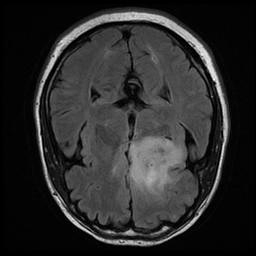

In [36]:
array_to_img(train_images[10])

<b> Transform the matrix </b>

Train

In [38]:
train_img_unrow = train_images.reshape(500, -1).T

In [39]:
np.shape(train_img_unrow)

(196608, 500)

Test

In [40]:
m = 100
test_img_unrow = test_images.reshape(m, -1).T

In [41]:
np.shape(test_img_unrow)

(196608, 100)

Class Indices

In [43]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [44]:
train_labels_final = train_labels.T[[1]]

In [45]:
np.shape(train_labels_final)

(1, 500)

In [46]:
test_labels_final = test_labels.T[[1]]

In [47]:
np.shape(test_labels_final)

(1, 100)

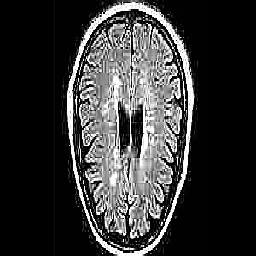

In [48]:
array_to_img(train_images[240])

In [49]:
train_labels_final[:,240]

array([0.], dtype=float32)

### Data Standardization

In [50]:
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

type(test_img_unrow)

numpy.ndarray

### Logistic Regression-based Neural Network

<b> Initialize b </b>

In [51]:
b = 0

<b> Initialize w </b>

In [52]:
def init_w(n):
    w = np.zeros((n,1))
    return w

In [56]:
w = init_w(256*256*3)

<b> Forward Propagation </b>

In [57]:
def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))    
    dw = (1/l) * np.dot(x,(y_hat - y).T)
    db = (1/l) * np.sum(y_hat - y)
    return dw, db, cost

In [58]:
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

In [59]:
print(dw)

print(db)

print(cost)

[[-0.00364706]
 [-0.00269804]
 [-0.0033451 ]
 ...
 [-0.01177647]
 [-0.01160784]
 [-0.01128235]]
-0.002
0.6931471805599454


<b> Optimization </b>

In [60]:
def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, x, y)    
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

In [61]:
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 
                           num_iterations= 151, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 50: 0.521153
Cost after iteration 100: 0.454500
Cost after iteration 150: 0.411769


<b> Label Predictions </b>

In [62]:
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = np.zeros((1, l))
    w = w.reshape(x.shape[0], 1)
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b))) 
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        if (y_hat[0,i] > 0.5): 
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    return y_prediction

In [63]:
w = np.array([[0.035], [0.123], [0.217]])
b = 0.2
x = np.array([[0.2, 0.4, -1.2, -2], 
              [1, -2., 0.1, -1], 
              [0.2, 0.4, -1.2, -2]])

prediction(w, b, x)

array([[1., 1., 0., 0.]])

<b> Overall Model </b>

In [64]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test errors
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {'costs': costs, 
              'y_pred_test': y_pred_test,  
              'y_pred_train' : y_pred_train,  
              'w' : w, 
              'b' : b, 
              'learning_rate' : learning_rate, 
              'num_iterations': num_iterations}
    
    return output

In [65]:
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final,
               num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147


C:\Users\msavg\AppData\Local\Temp\ipykernel_1844\3547166593.py:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))
C:\Users\msavg\AppData\Local\Temp\ipykernel_1844\3547166593.py:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))


Cost after iteration 50: 1.428492
Cost after iteration 100: 0.232415
Cost after iteration 150: 0.082094
Cost after iteration 200: 0.037336
Cost after iteration 250: 0.024759
Cost after iteration 300: 0.017805
Cost after iteration 350: 0.013923
Cost after iteration 400: 0.011646
Cost after iteration 450: 0.010154
Cost after iteration 500: 0.009082
Cost after iteration 550: 0.008264
Cost after iteration 600: 0.007614
Cost after iteration 650: 0.007081
Cost after iteration 700: 0.006633
Cost after iteration 750: 0.006250
Cost after iteration 800: 0.005917
Cost after iteration 850: 0.005625
Cost after iteration 900: 0.005366
Cost after iteration 950: 0.005134
Cost after iteration 1000: 0.004925
Cost after iteration 1050: 0.004735
Cost after iteration 1100: 0.004562
Cost after iteration 1150: 0.004403
Cost after iteration 1200: 0.004256
Cost after iteration 1250: 0.004121
Cost after iteration 1300: 0.003995
Cost after iteration 1350: 0.003877
Cost after iteration 1400: 0.003768
Cost after i